# Explore a NuGrid star model in iPython notebook

## How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code
* in this notebook you use the [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

## Initialize session

In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    
#data_dir="/data/nugrid_vos/"    


ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 2 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [2]:
s=ms.star_log(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 



Let's now see what the model looks like by making some Kippenhahn diagrams

<IPython.core.display.Javascript object>


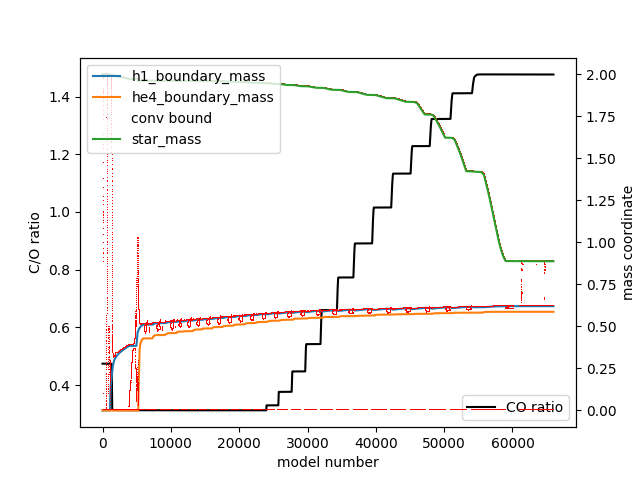

In [3]:
ifig=111;close(ifig);figure(ifig)
s.kippenhahn_CO(111,'model')

What's happening at the centre of the star? ...

<IPython.core.display.Javascript object>


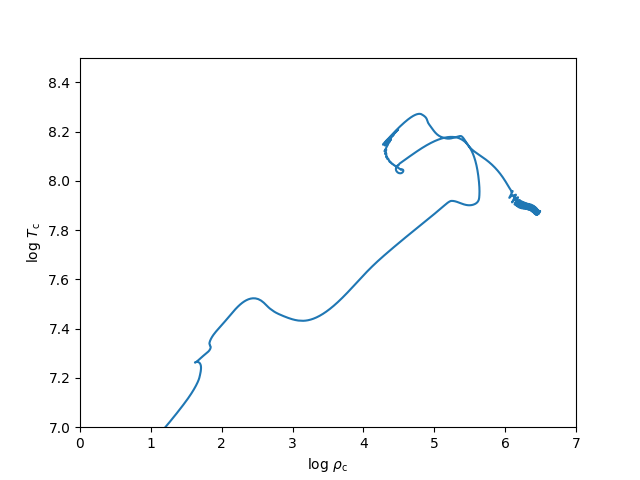

[0, 7, 7, 8.5]

In [4]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])

... and at the surface?

<IPython.core.display.Javascript object>


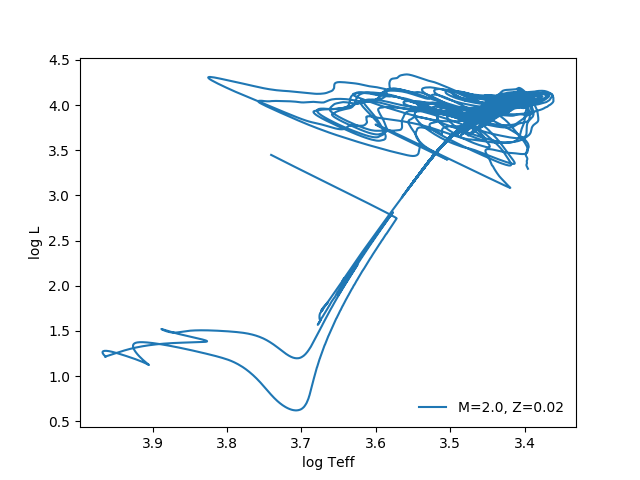

In [5]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

<IPython.core.display.Javascript object>


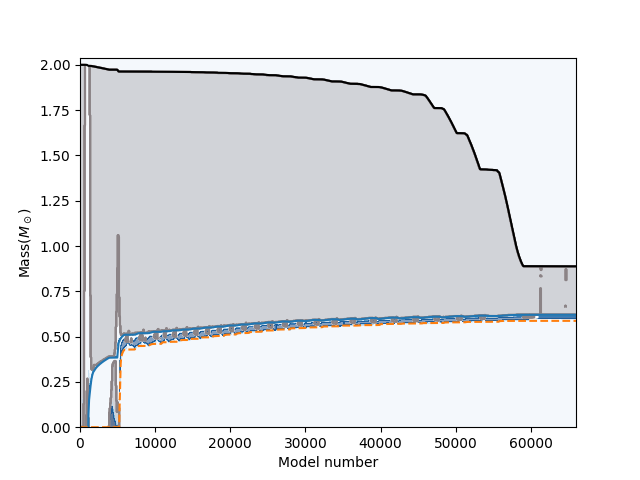

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [6]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 2 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [7]:
pt=mp.se(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


## What quantities are available in this data type, and what are the units?
Each of the _se_ file sets (in fact each of the dozens of hdf5 files that make up the data set for one mass/metallicty combination, or stellar evolution track) has three types of data contained in them:

data type access | content 
----------------|---------
 `pt.se.hattrs` |  a header section that holds the _header attributes_, including units in the form of factors so that if applied with the quantities the result is in cgs units 
`pt.se.cattrs` | for each cycle (or time step) the _cycle attributes_ are a number of scalar global quantities, such as total mass or star age
`pt.se.dcols` | again, for each time step these are the vector quantities available, i.e. the data table columns; one of the data columns, _iso_massf_ is in fact a matrix where the matrix columns are different species, i.e. a radial vector of species vectors

In [8]:
pt.se.hattrs

['HDF5_version',
 'SE_version',
 'numcodev',
 'codev',
 'modname',
 'mini',
 'zini',
 'rotini',
 'overini',
 'zisnb',
 'age_unit',
 'mass_unit',
 'radius_unit',
 'rho_unit',
 'temperature_unit',
 'dcoeff_unit']

In [9]:
pt.se.cattrs

['shellnb', 'age', 'deltat', 'total_mass']

In [10]:
pt.se.dcols

['mass', 'radius', 'rho', 'temperature', 'dcoeff', 'iso_massf']

We can use the `get` method to pull any of the data in

### Example
What is the unit of the temperature?

In [11]:
pt.get('temperature_unit')/1.e9

1.0

<IPython.core.display.Javascript object>


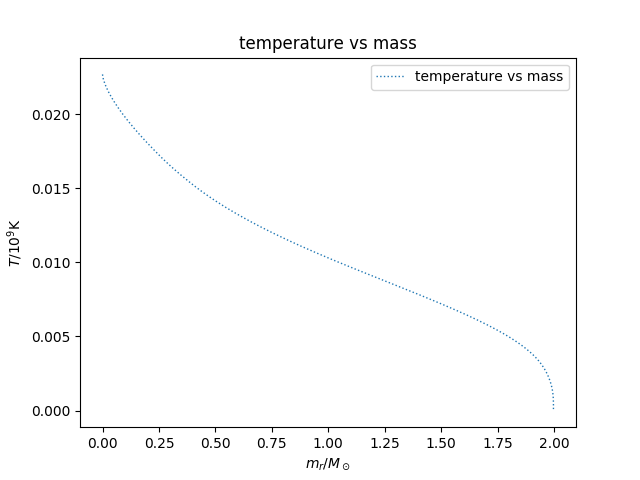

 reading ['mass']...100%0.0604097843170166


In [23]:
ifig=122;close(ifig);figure(ifig)
pt.plot('mass','temperature',fname=1000,shape=':')
ylabel('$T / 10^9 \mathrm{K}$')
xlabel('$m_r/M_\odot$')

### Abundance profiles 

#### A number of isotopes in the H shell 
In the stellar evolution analysis we found that a H-burning shell inbetween thermal pulses could be found at cycle 18000. Let's plot a few isotopes that are being created or destroyed in this H-burning shell:

In [13]:
# pt.abu_profile?

and the nuclides that are being created or destroyed in this part of the star:

<IPython.core.display.Javascript object>


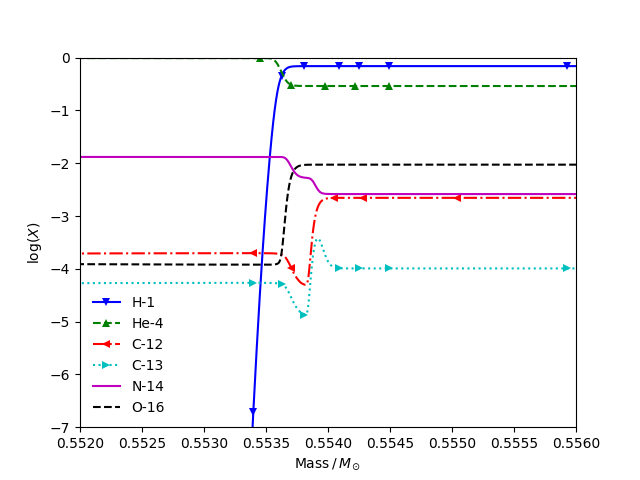

 reading ['iso_massf']...100%

(0.552, 0.556)

In [14]:
species=['H-1','He-4','C-12','C-13','N-14','O-16']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=18000, logy=True)
ylim(-7,0)
xlim(0.552,0.556)

#### Abundance profile at the time of formation of the partial-mix zone

In [15]:
species=['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

<IPython.core.display.Javascript object>


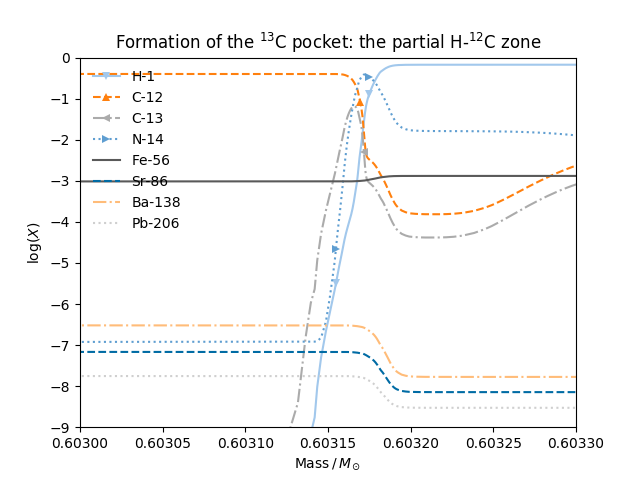

 reading ['iso_massf']...100%

In [16]:
ifig=121;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=45500, logy=True, colourblind=True)
ylim(-9,0)
xlim(0.603,0.6033)
title("Formation of the $^\mathsf{13}\mathsf{C}$ pocket: the partial H-$^\mathsf{12}\mathsf{C}$ zone")

<IPython.core.display.Javascript object>


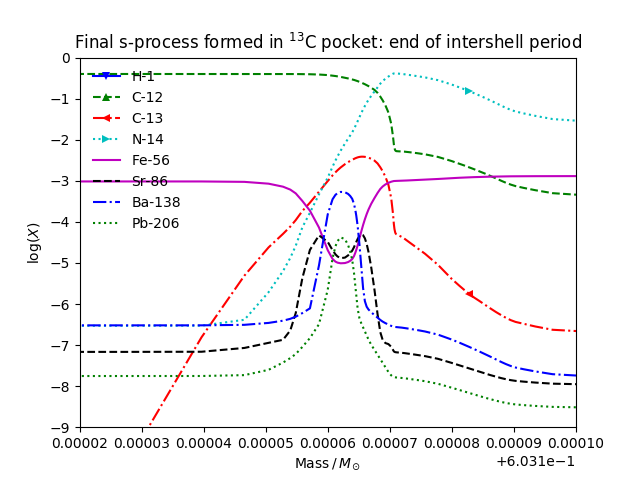

 reading ['iso_massf']...100%

In [17]:
ifig=124;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=47222, logy=True, colourblind=False)
ylim(-9,0)
xlim(0.60312,0.6032)
title("Final s-process formed in $^\mathsf{13}\mathsf{C}$ pocket: end of intershell period")

### Isotopic abundance distribution in the C13 pocket

#### Static plots



In [18]:
# help
#pt.iso_abund?

<IPython.core.display.Javascript object>


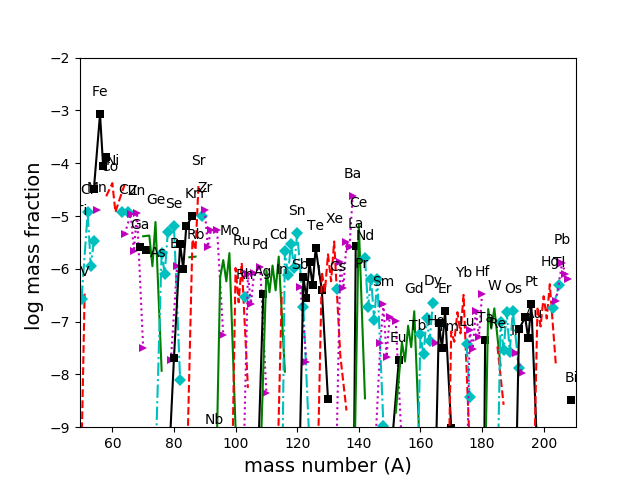

 reading ['mass']...100%Using the following conditions:
	mass_range: 0.60312 0.6032
	Atomic mass_range: 50 210
	cycle:            0000047220
	plot only stable: True
	plot decayed:     False


In [19]:
ifig=123;close(ifig);figure(ifig)
pt.iso_abund(47221, stable=True,amass_range=[50,210], mass_range=[0.60312,0.6032], ylim=[-9, -2])


### Abundance chart plot
We can also see the impact on the isotopic abundance chart for that part of the star:

In [20]:
# pt.abu_chart?

 reading ['mass']...100%.100%

<IPython.core.display.Javascript object>


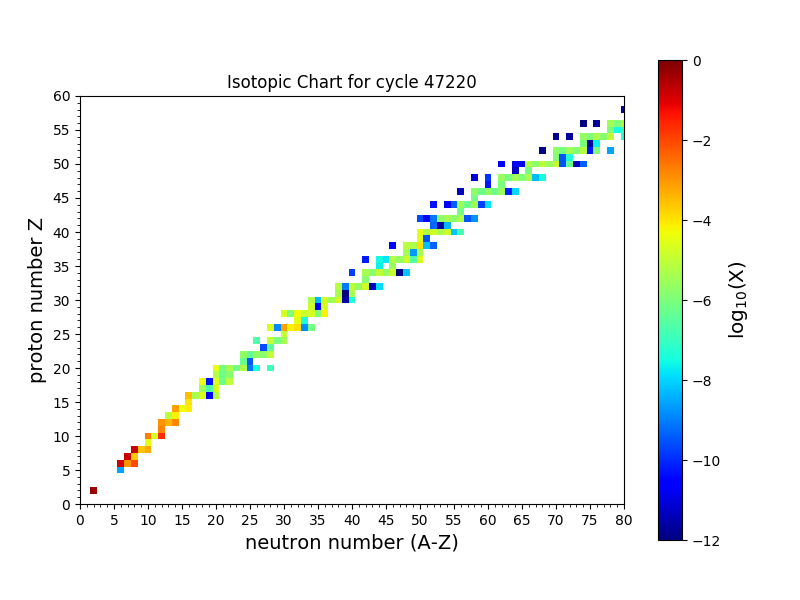

In [21]:
#ifig=1233;close(ifig);figure(ifig)
pt.abu_chart(47220,mass_range=[0.60312,0.6032], plotaxis=[0, 80, 0, 60],\
             ilabel=False,imlabel=False,boxstable=False)


You can extract the trajectory and initial abundances from this model at the key mass coordinate for use in a 1-zone PPN simulation in order to study, for example, the impact of a new rate

In [22]:
pt.abund_at_masscoordinate(26100,0.57685,online=True)

 reading ['rho']...100%iso_massf
 reading ['iso_massf']...100%

/home/user/wendi-examples/Stellar evolution and nucleosynthesis data/massf_0.57685.dat